In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


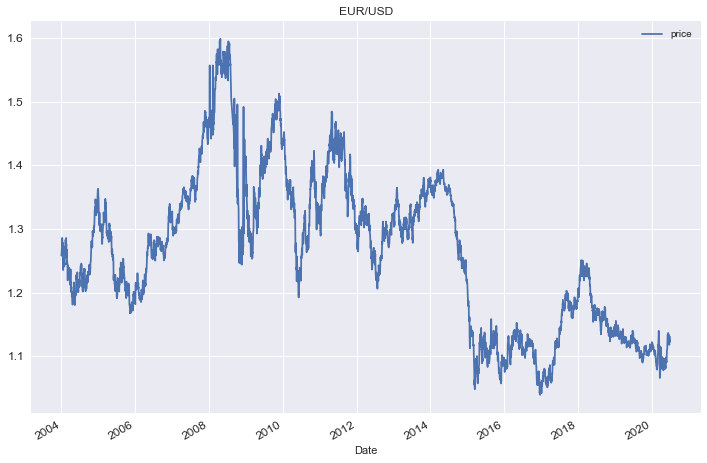

In [5]:
df.plot(figsize=(12,8), title="EUR/USD",fontsize=12)
plt.show()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


# Simple buy and hold strat

In [7]:
df.dropna(inplace=True)

In [8]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


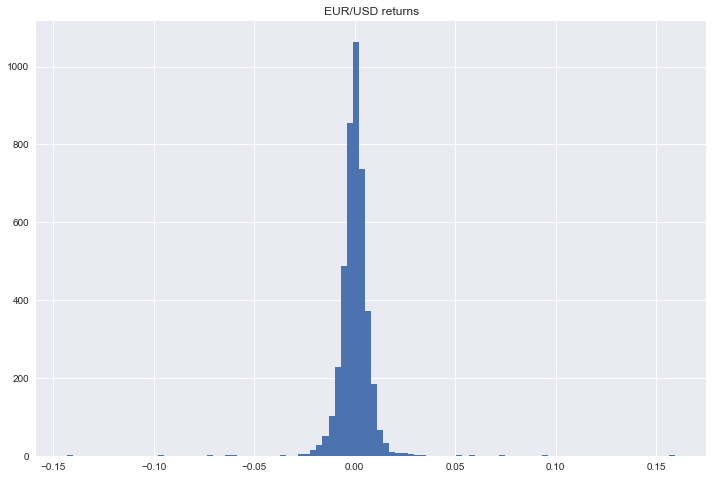

In [9]:
df.returns.hist(bins=100,figsize=(12,8))
plt.title("EUR/USD returns")
plt.show()

In [10]:
# Loss of 11% starting at day one and selling on last day of data
df.returns.sum()

-0.11214302770699824

In [11]:
np.exp(df.returns.sum())

0.8939163935445142

In [12]:
# Confirm by diving last price by first price
df.price[-1] / df.price[0]

0.8939163935445141

In [13]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [14]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [15]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


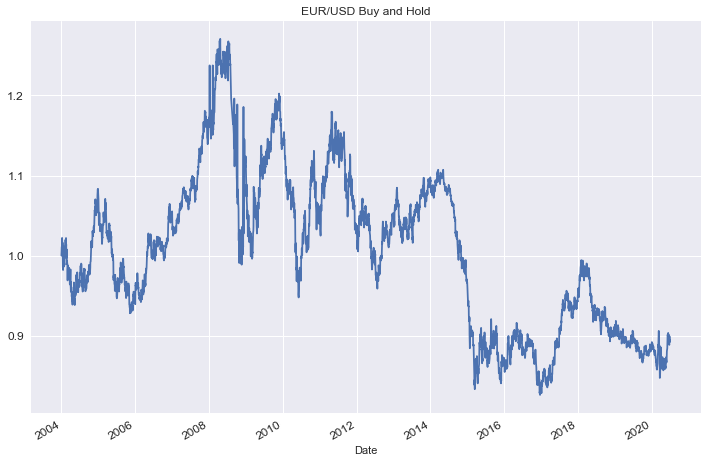

In [16]:
df.creturns.plot(figsize=(12,8), title="EUR/USD Buy and Hold", fontsize=12)
plt.show()

# Performance metrics

In [17]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [18]:
# Absolute performance
df.creturns.iloc[-1]

0.8939163935445142

In [20]:
# Absolute performance
df.returns.sum()

-0.11214302770699824

In [21]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


In [22]:
# 252 trading days per year
# Annualized mean return and risk
# Mean return
df.returns.mean() * 252

-0.006612083056191754

In [23]:
# Risk
df.returns.std() * np.sqrt(252)

0.12054120479431406

In [24]:
# maxiumum drawdown - we want it to be low as a trader
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [26]:
df["cummax"] = df.creturns.cummax()

In [27]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


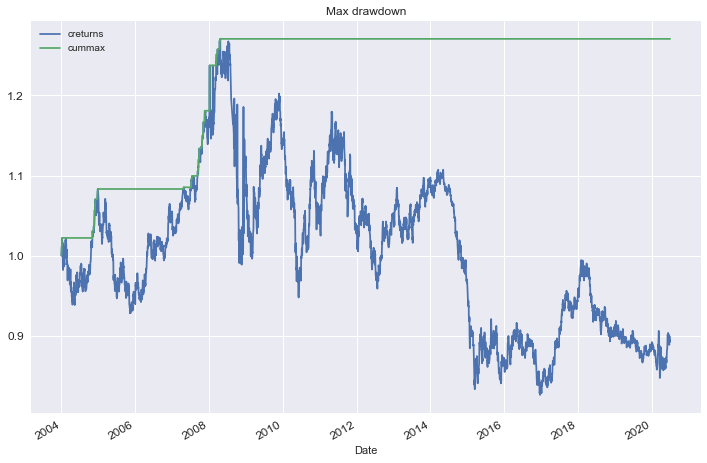

In [28]:
df[["creturns","cummax"]].dropna().plot(figsize=(12,8), title="Max drawdown", fontsize=12)
plt.show()

In [29]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [30]:
drawdown.max()

0.44488405699334443

In [33]:
# Where it happened
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

# SMA Crossover strat 

In [34]:
data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")

In [35]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [36]:
sma_s = 50
sma_l = 200

In [37]:
data.price.rolling(50)

Rolling [window=50,center=False,axis=0]

In [39]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [40]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [41]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


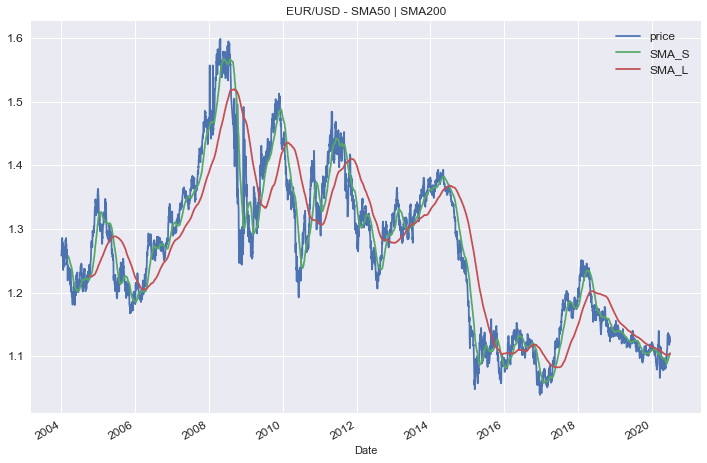

In [49]:
data.plot(figsize=(12,8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [50]:
data.dropna(inplace=True)

In [51]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


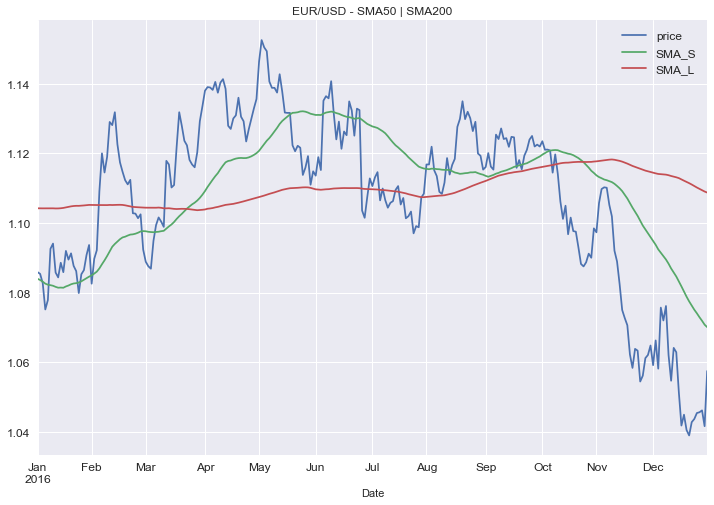

In [52]:
data.loc["2016"].plot(figsize=(12,8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [53]:
# When small crosses big going up, buy, else sell, downtrend coming 
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

In [54]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


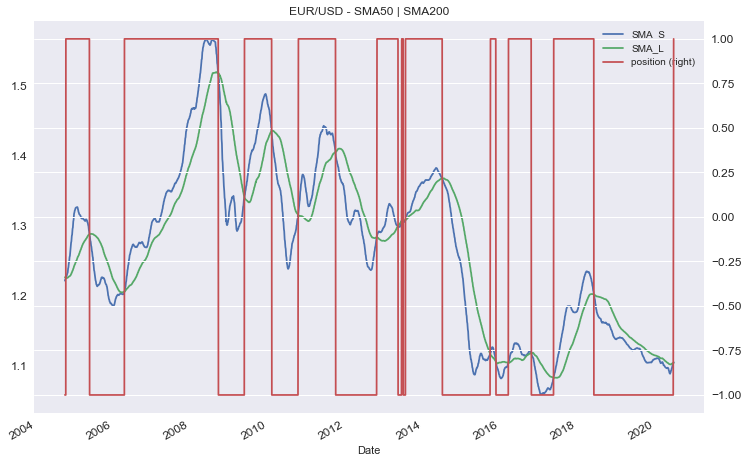

In [56]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize=(12,8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}", secondary_y="position",fontsize=12)
plt.show()

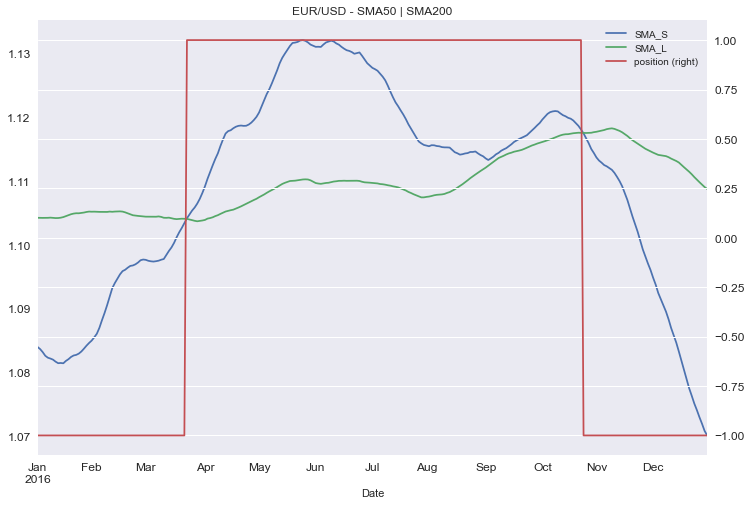

In [57]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize=(12,8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}", secondary_y="position",fontsize=12)
plt.show()

# Vectorized strat backtesting

In [58]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [59]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [60]:
# 1 or -1 * returns, shifted by one value up, otherwise you are offset by 1 day behind 
data["strategy"] = data.position.shift(1) * data["returns"]

In [61]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [62]:
data.dropna(inplace=True)

In [63]:
# Absoulte performance
data[["returns", "strategy"]].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [65]:
# Absoulte performance
# Buy and hold vs strategy 
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [66]:
# Annualized return
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [67]:
# Annualized risk
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [68]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


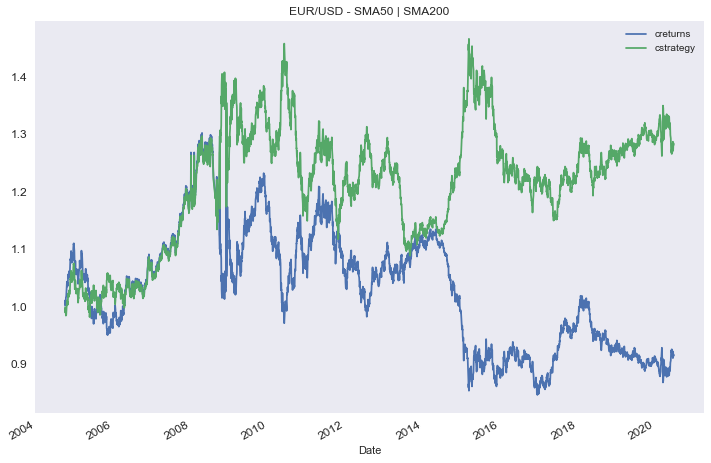

In [70]:
data[["creturns", "cstrategy"]].plot(figsize=(12,8), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}", secondary_y="position",fontsize=12)
plt.show()

In [72]:
# Diff the ending results of the two
outPerformance = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outPerformance

0.3676743925451291

# Finding Optimal SMA strat

In [73]:
df = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")

In [74]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [77]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace=True)
    
    return data[["returns", "strategy"]].sum().apply(np.exp)

In [78]:
run_strategy((50, 200))

returns     0.915826
strategy    1.283500
dtype: float64

In [79]:
run_strategy((22, 252))

returns     0.83984
strategy    1.14928
dtype: float64

In [80]:
# Lose money in both, must be above 1 for profit 
run_strategy((10, 50))

returns     0.919492
strategy    0.987000
dtype: float64

In [81]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace=True)
    
    # maximize absoulte performance 
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [82]:
from scipy.optimize import brute

In [83]:
brute(run_strategy, ((10,50,1),(100,252,1)))

array([ 46., 137.])

In [85]:
-run_strategy((46, 137))

2.526693989781075